In [ ]:
import pandas as pd
from sklearn import tree
from matplotlib import pyplot as plt

df = pd.read_csv('https://raw.githubusercontent.com/diogenesjusto/FIAP-On-Line-Graduation/main/datasets/arvore_titanic.csv')


df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# Definição dos dados da árvore
x_treino = df[['SibSp']]
y_treino = df['Survived']

# Construção da árvore
mod = tree.DecisionTreeClassifier()
mod = mod.fit(x_treino, y_treino)

# Visualização da árvore em formato de texto
text_representation = tree.export_text(mod)
print(text_representation)

|--- feature_0 <= 0.50
|   |--- class: 0
|--- feature_0 >  0.50
|   |--- feature_0 <= 2.50
|   |   |--- feature_0 <= 1.50
|   |   |   |--- class: 1
|   |   |--- feature_0 >  1.50
|   |   |   |--- class: 0
|   |--- feature_0 >  2.50
|   |   |--- feature_0 <= 4.50
|   |   |   |--- feature_0 <= 3.50
|   |   |   |   |--- class: 0
|   |   |   |--- feature_0 >  3.50
|   |   |   |   |--- class: 0
|   |   |--- feature_0 >  4.50
|   |   |   |--- class: 0



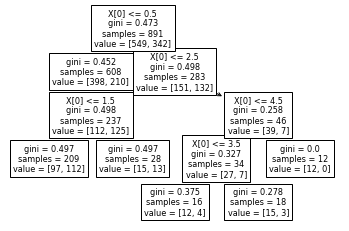

In [ ]:
# Visualização da árvore em formato gráfico
tree.plot_tree(mod)
plt.show()

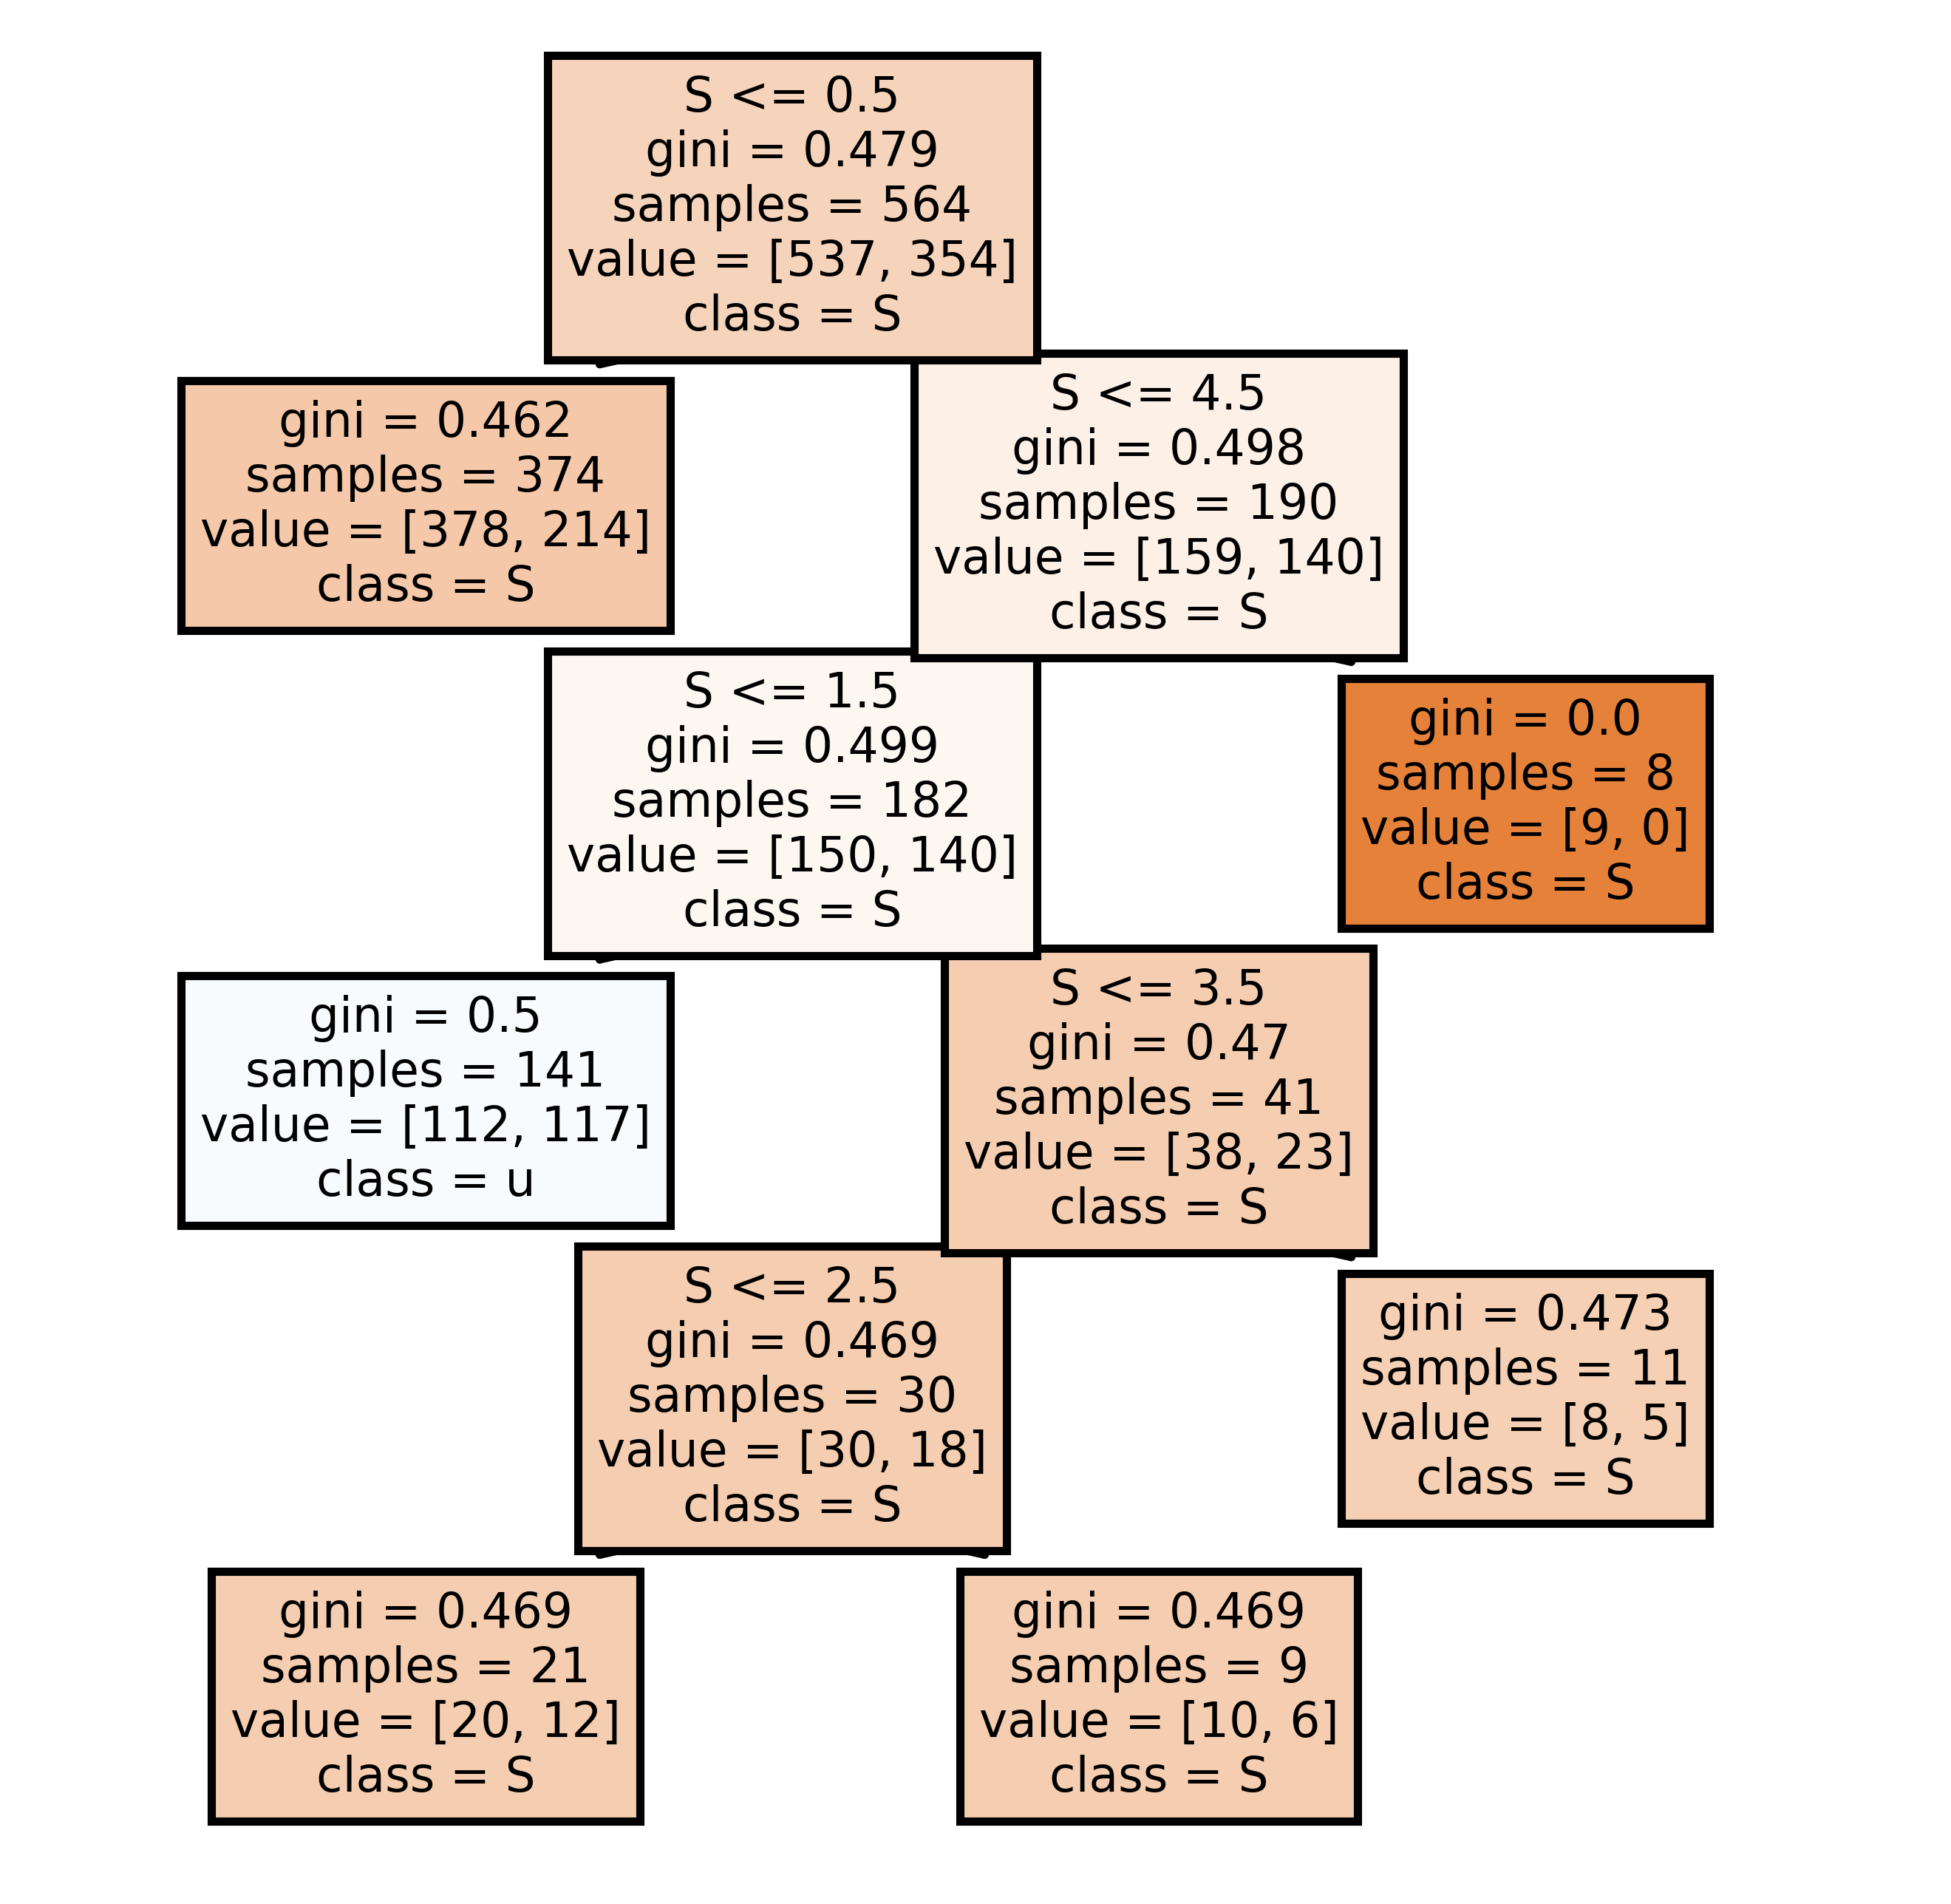

In [ ]:
from sklearn.ensemble import RandomForestClassifier
mod = RandomForestClassifier(n_estimators = 1000, random_state = 42)
# Train the model on training data
mod = mod.fit(x_treino, y_treino)

fn = 'SibSp'
cn = 'Survived'
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(mod.estimators_[0],
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('rf_individualtree.png')